In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('car_price.csv')
df

,Unnamed: 0,brand_name,model,year,variant,distance,city,num_of_owners,price
0,0,Honda,Jazz,2018,V CVT,64554,Amhedabad,1,7.05
1,1,Hyundai,Verna,2018,VTVT 1.6 SX Option,54195,Amhedabad,1,10.00
2,2,Honda,Jazz,2016,V CVT,39821,Amhedabad,1,6.25
3,3,Honda,Jazz,2017,1.2 S i VTEC,54966,Amhedabad,1,5.12
4,4,Hyundai,i20,2018,1.2 Spotz,29771,Amhedabad,1,6.37
...,...,...,...,...,...,...,...,...,...
5152,5152,Mahindra,Thar,2014,CRDe AC,12000,Pune,2,7.75
5153,5153,Toyota,Etios,2013,V,71000,Pune,2,3.65
5154,5154,Hyundai,i10,2008,Magna,90000,Pune,2,1.90
5155,5155,Hyundai,Santa_Fe,2012,4x4 AT,126000,Pune,2,7.75


In [4]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
df

,brand_name,model,year,variant,distance,city,num_of_owners,price
0,Honda,Jazz,2018,V CVT,64554,Amhedabad,1,7.05
1,Hyundai,Verna,2018,VTVT 1.6 SX Option,54195,Amhedabad,1,10.00
2,Honda,Jazz,2016,V CVT,39821,Amhedabad,1,6.25
3,Honda,Jazz,2017,1.2 S i VTEC,54966,Amhedabad,1,5.12
4,Hyundai,i20,2018,1.2 Spotz,29771,Amhedabad,1,6.37
...,...,...,...,...,...,...,...,...
5152,Mahindra,Thar,2014,CRDe AC,12000,Pune,2,7.75
5153,Toyota,Etios,2013,V,71000,Pune,2,3.65
5154,Hyundai,i10,2008,Magna,90000,Pune,2,1.90
5155,Hyundai,Santa_Fe,2012,4x4 AT,126000,Pune,2,7.75


# EDA

In [6]:
df.isnull().sum()
#no null values present

brand_name       0
model            0
year             0
variant          0
distance         0
city             0
num_of_owners    0
price            0
dtype: int64

In [7]:
df.dtypes

brand_name        object
model             object
year               int64
variant           object
distance           int64
city              object
num_of_owners      int64
price            float64
dtype: object

In [7]:
df['brand_name'].unique()

array(['Honda', 'Hyundai', 'Tata', 'Maruti', 'Renault', 'Jeep',
       'Mahindra', 'Nissan', 'MG', 'Volkswagen', 'Datsun', 'Skoda',
       'Toyota', 'BMW', 'Chevrolet', 'Ford', 'Jaguar', 'Mercedes-Benz',
       'Land', 'Fiat', 'Kia', 'Audi', 'Volvo', 'Porsche', 'Mitsubishi',
       'Isuzu', 'Aston', 'Mini', 'Ambassador', 'Lexus', 'Maserati'],
      dtype=object)

In [8]:
df['brand_name'].nunique()

31

In [9]:
df['model'].unique()

array(['Jazz', 'Verna', 'i20', 'Tiago', 'Grand_i10', 'Ignis', 'KWID',
       'Duster', 'Tucson', 'Compass', 'Ciaz', 'KUV_100', 'Vitara_Brezza',
       'Magnite', 'EON', 'Baleno', 'Hector', 'Alto_800', 'City', 'Lodgy',
       'Alto_K10', 'Swift', 'Polo', 'RediGO', 'Santro', 'Xcent',
       'Terrano', 'Tigor', 'i10', 'Brio', 'SX4_S', 'Marazzo', 'Wagon_R',
       'S-Presso', 'Swift_Dzire', 'Vento', 'Amaze', 'CR-V', 'Creta',
       'XUV500', 'Rapid', 'GO', 'Micra_Active', 'Thar', 'Mobilio',
       'Ertiga', 'Eeco', '800', 'Innova_Crysta', 'Bolero_Power',
       '5_Series', 'Innova', 'Corolla_Altis', 'Sunny', 'Civic', 'WR-V',
       'X1', 'Sonata', 'Ritz', 'Cruze', 'Harrier', 'Ecosport', 'XL6',
       'New_Safari', 'Pulse', 'XUV300', 'XF', 'S-Class', 'Wrangler',
       'Endeavour', 'Zest', 'Astor', 'Figo', 'Rover_Discovery', 'Punto',
       'Micra', 'Sonet', 'GLA_Class', 'TUV_300', 'Q3', 'Seltos',
       'Fortuner', 'E-Class', 'Elantra', 'Celerio', 'Xylo', 'Nexon',
       'Scorpio', 'Fiesta

In [10]:
df['model'].nunique()

243

In [12]:
df['variant'].nunique()

1493

In [12]:
df.columns

Index(['brand_name', 'model', 'year', 'variant', 'distance', 'city',
       'num_of_owners', 'price'],
      dtype='object')

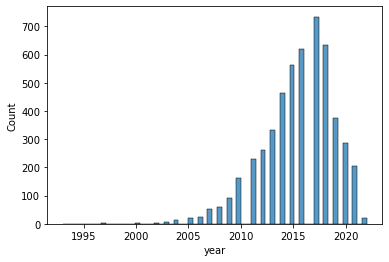

In [18]:
sns.histplot(df['year'])
plt.show()

#skewness is clearly visible
#newer cars are more in number.

<AxesSubplot:xlabel='year', ylabel='price'>

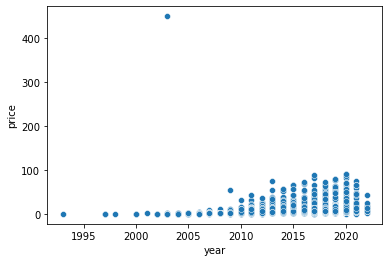

In [19]:
sns.scatterplot(df['year'],df['price'])

#relatively newer cars are sold at higher price.

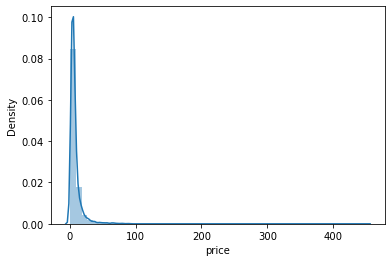

In [21]:
sns.distplot(df['price'])
plt.show()

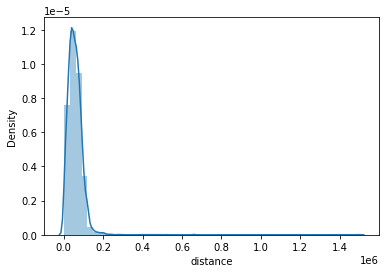

In [32]:
sns.distplot(df['distance'])
plt.show()

In [22]:
df['price'].skew()

15.35001034307279

<AxesSubplot:xlabel='num_of_owners', ylabel='count'>

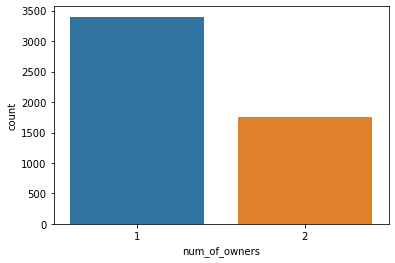

In [23]:
sns.countplot(df['num_of_owners'])

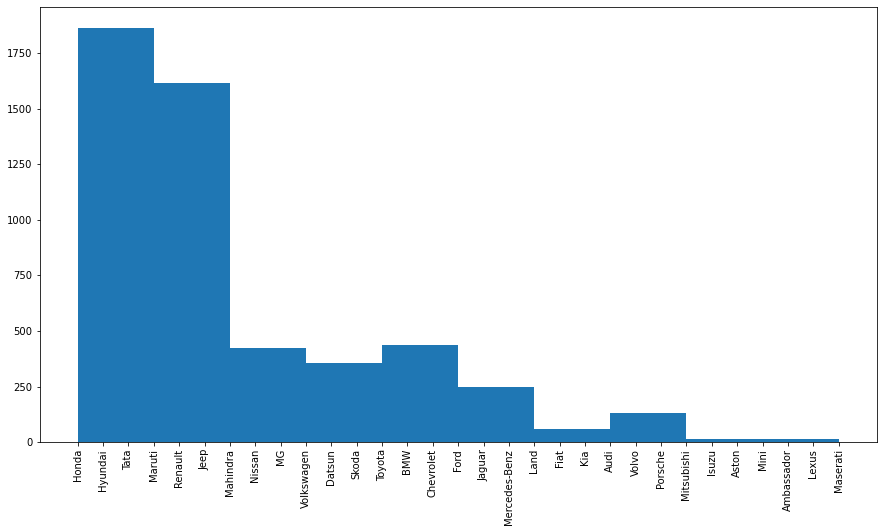

In [27]:
plt.figure(figsize=(15,8))
plt.hist(df['brand_name'])
plt.xticks(rotation=90)
plt.show()

#some cars are present in very high numbers while some cars are present in very low numbers.

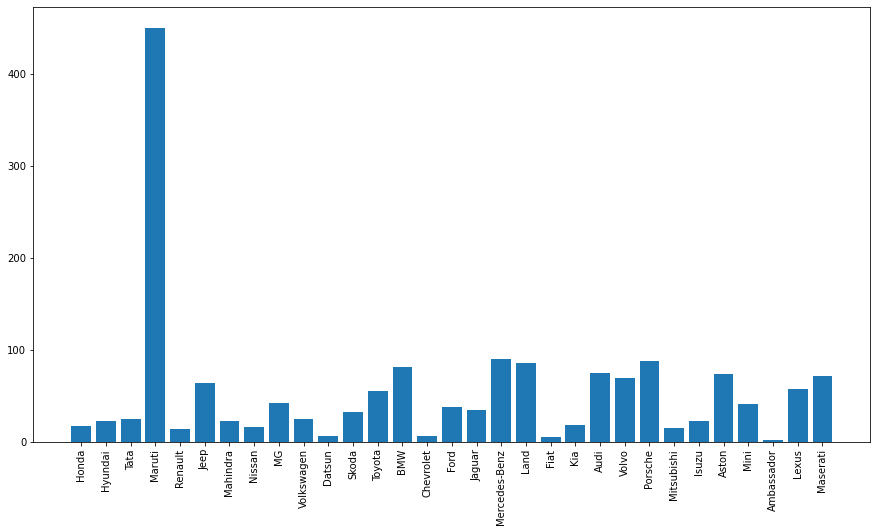

In [31]:
plt.figure(figsize=(15,8))
plt.bar(df['brand_name'],df['price'])
plt.xticks(rotation=90)
plt.show()

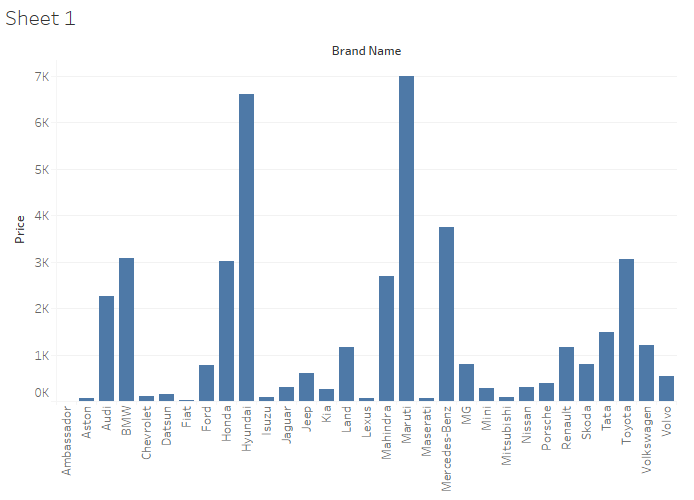

In [ ]:
#this graph is showing the sum of price of all the cars in a particulars brand.

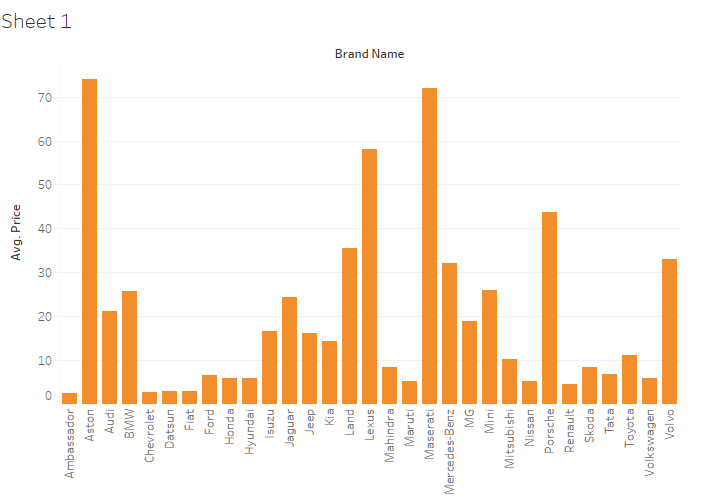

In [ ]:
#this is showing the average price of all the cars of a particular brand.
#The luxury cars are having higher average price.

<AxesSubplot:xlabel='distance', ylabel='price'>

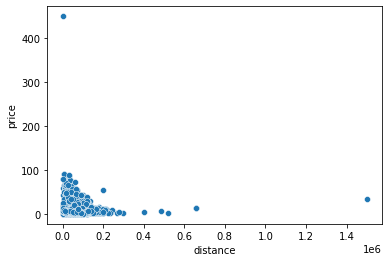

In [33]:
sns.scatterplot(df['distance'],df['price'])
#outliers might be present in data.
#maximum price is decreasing with distance.

<AxesSubplot:xlabel='price', ylabel='Density'>

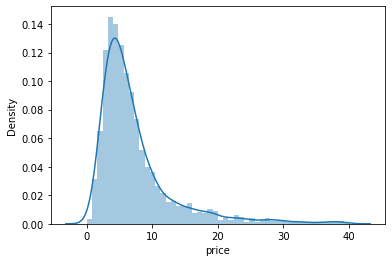

In [34]:
sns.distplot(df['price'])

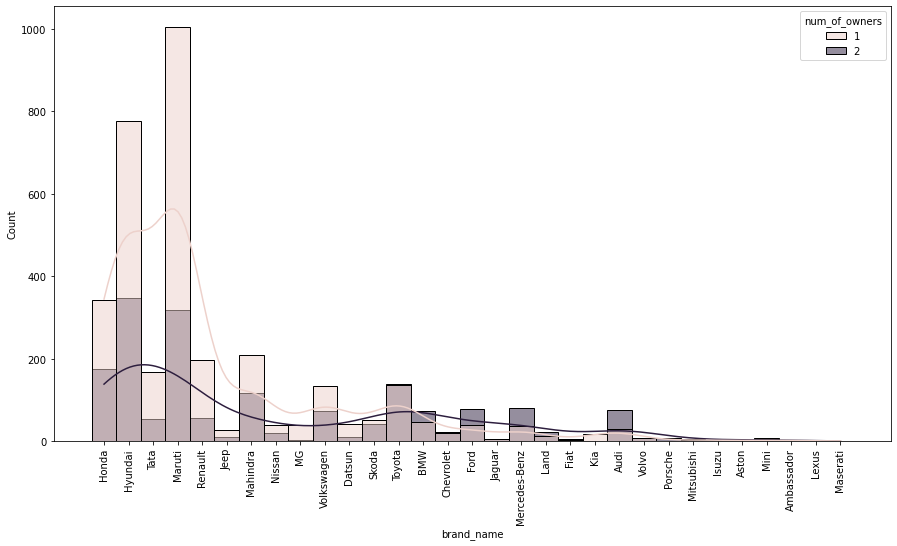

In [36]:
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='brand_name',bins=20,kde=True,hue='num_of_owners')
plt.xticks(rotation=90)
plt.show()


<Figure size 1080x576 with 0 Axes>

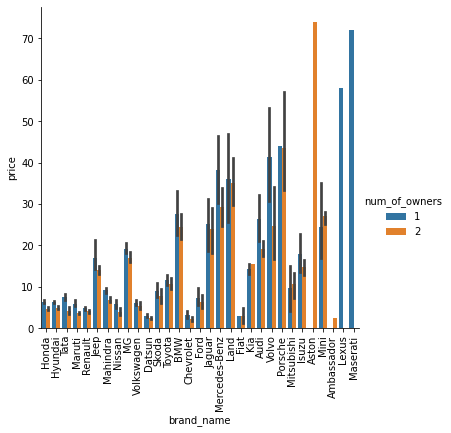

In [42]:
plt.figure(figsize=(15,8))
sns.catplot(x="brand_name",y="price",hue="num_of_owners",data=df,kind="bar")#Multivariate since two columns are given as input
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x576 with 0 Axes>

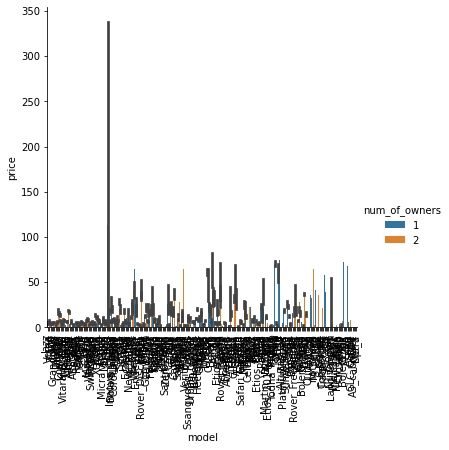

In [43]:
plt.figure(figsize=(15,8))
sns.catplot(x="model",y="price",hue="num_of_owners",data=df,kind="bar")#Multivariate since two columns are given as input
plt.xticks(rotation=90)
plt.show()

In [34]:
df.columns

Index(['brand_name', 'model', 'year', 'variant', 'distance', 'city',
       'num_of_owners', 'price'],
      dtype='object')

# Data Preprocessing

In [8]:
df

,brand_name,model,year,variant,distance,city,num_of_owners,price
0,Honda,Jazz,2018,V CVT,64554,Amhedabad,1,7.05
1,Hyundai,Verna,2018,VTVT 1.6 SX Option,54195,Amhedabad,1,10.00
2,Honda,Jazz,2016,V CVT,39821,Amhedabad,1,6.25
3,Honda,Jazz,2017,1.2 S i VTEC,54966,Amhedabad,1,5.12
4,Hyundai,i20,2018,1.2 Spotz,29771,Amhedabad,1,6.37
...,...,...,...,...,...,...,...,...
5152,Mahindra,Thar,2014,CRDe AC,12000,Pune,2,7.75
5153,Toyota,Etios,2013,V,71000,Pune,2,3.65
5154,Hyundai,i10,2008,Magna,90000,Pune,2,1.90
5155,Hyundai,Santa_Fe,2012,4x4 AT,126000,Pune,2,7.75


In [9]:
le_brand=LabelEncoder()
df['brand_name']=le_brand.fit_transform(df['brand_name'])

In [11]:
df['brand_name'].unique()

array([ 8,  9, 27, 18, 25, 12, 17, 23, 16, 29,  5, 26, 28,  3,  4,  7, 11,
       20, 14,  6, 13,  2, 30, 24, 22, 10,  1, 21,  0, 15, 19])

In [12]:
le_model=LabelEncoder()
df['model']=le_model.fit_transform(df['model'])

In [19]:
le_variant=LabelEncoder()
df['variant']=le_variant.fit_transform(df['variant'])

In [20]:
le_city=LabelEncoder()
df['city']=le_city.fit_transform(df['city'])

In [21]:
df

,brand_name,model,year,variant,distance,city,num_of_owners,price
0,8,114,2018,1213,64554,0,1,7.05
1,9,212,2018,1246,54195,0,1,10.00
2,8,114,2016,1213,39821,0,1,6.25
3,8,114,2017,100,54966,0,1,5.12
4,9,240,2018,107,29771,0,1,6.37
...,...,...,...,...,...,...,...,...
5152,17,198,2014,672,12000,13,2,7.75
5153,28,78,2013,1210,71000,13,2,3.65
5154,9,239,2008,962,90000,13,2,1.90
5155,9,177,2012,538,126000,13,2,7.75


In [22]:
df.corr()

,brand_name,model,year,variant,distance,city,num_of_owners,price
brand_name,1.000000,0.042176,0.087298,-0.053723,0.046338,0.038688,-0.042419,-0.030039
model,0.042176,1.000000,-0.045917,0.139909,0.056834,0.007908,-0.014275,-0.067354
year,0.087298,-0.045917,1.000000,0.009861,-0.386364,0.001829,-0.414067,0.200679
variant,-0.053723,0.139909,0.009861,1.000000,-0.020886,0.018220,-0.051954,-0.031256
distance,0.046338,0.056834,-0.386364,-0.020886,1.000000,0.021031,0.203597,-0.082874
city,0.038688,0.007908,0.001829,0.018220,0.021031,1.000000,-0.011397,-0.054463
num_of_owners,-0.042419,-0.014275,-0.414067,-0.051954,0.203597,-0.011397,1.000000,0.035767
price,-0.030039,-0.067354,0.200679,-0.031256,-0.082874,-0.054463,0.035767,1.000000


<AxesSubplot:>

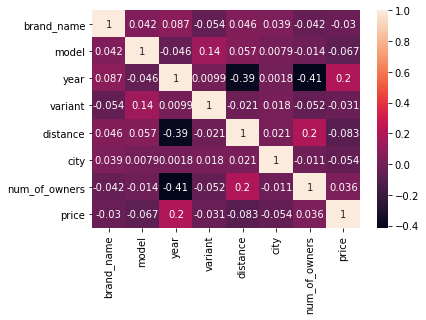

In [25]:
sns.heatmap(df.corr(),annot=True)

#since all columns has low correlation with the target, we are not dropping any column.

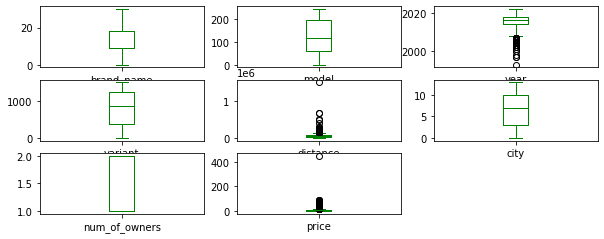

In [27]:
df.plot(kind='box',subplots=True,layout=(15,3),figsize=(10,20),color='green')
plt.show()

In [28]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3.0).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(5157, 8)
(4988, 8)
loss_percent=  3.2770990886174136


In [29]:
df=df_new

# Model testing starts

In [30]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.17706485742176625
root_mean_sqaured_error: 5.074068941276743
mean_absolute_error: 3.330587564047331


In [32]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_rfr)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_rfr))

r2_score for RandomForestRegression is:  0.848835572898778
root_mean_sqaured_error: 2.174695022786188
mean_absolute_error: 0.9801297564078155


In [45]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train.values.reshape(-1,1)))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.49970038995060073
root_mean_sqaured_error: 3.9562947657558447
mean_absolute_error: 2.140323647294589


In [43]:
x.shape

(4988, 7)

In [44]:
y.shape

(4988,)

In [46]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))


r2_score for RandomForestRegression is:  0.49970038995060073
root_mean_sqaured_error: 3.9562947657558447
mean_absolute_error: 2.140323647294589


In [47]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

#scaler = StandardScaler()
#x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))


r2_score for RandomForestRegression is:  0.020839533470466298
root_mean_sqaured_error: 5.534781677388693
mean_absolute_error: 3.8037605156312626


In [49]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)

pt_y=PowerTransformer()

x_train,x_test,y_train,y_test=train_test_split(x_pt,y,test_size=0.20,random_state=42)
knr=KNeighborsRegressor()
knr.fit(x_train,pt_y.fit_transform(y_train.values.reshape(-1,1)))
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,pt_y.inverse_transform(y_pred)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,pt_y.inverse_transform(y_pred))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,pt_y.inverse_transform(y_pred)))


r2_score for RandomForestRegression is:  0.5006472190608073
root_mean_sqaured_error: 3.9525493010635606
mean_absolute_error: 1.998341931713735


In [51]:
pt_y.inverse_transform(y_pred)

array([[ 2.80545643],
       [ 5.23472964],
       [ 8.58246848],
       [ 6.45046517],
       [ 1.20863016],
       [ 4.63297742],
       [ 3.88362951],
       [ 5.93215465],
       [ 1.92336904],
       [ 2.65080913],
       [ 5.71434436],
       [ 5.43544451],
       [ 5.71152694],
       [ 9.53208601],
       [ 5.95045381],
       [10.37933306],
       [ 7.52386947],
       [ 3.50945922],
       [ 6.38352427],
       [ 3.6899221 ],
       [ 3.25521513],
       [ 3.87036539],
       [ 4.13852522],
       [ 7.47985029],
       [ 8.05700109],
       [ 6.73540692],
       [ 3.49289513],
       [ 4.62306426],
       [ 4.74431189],
       [12.15231042],
       [ 3.83711986],
       [ 2.88497636],
       [ 2.90277305],
       [ 9.44947797],
       [ 5.14942033],
       [ 6.96574722],
       [10.91230778],
       [ 9.46441244],
       [ 1.98400784],
       [ 3.74721631],
       [ 9.62320582],
       [ 4.25285256],
       [ 6.66311255],
       [ 3.29263452],
       [ 2.48339895],
       [ 7

In [55]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)

pt_y=PowerTransformer()

x_train,x_test,y_train,y_test=train_test_split(x_pt,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor()
knr.fit(x_train,pt_y.fit_transform(y_train.values.reshape(-1,1)))
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,pt_y.inverse_transform(y_pred.reshape(-1,1))))
print('root_mean_sqaured_error:',mean_squared_error(y_test,pt_y.inverse_transform(y_pred.reshape(-1,1)))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,pt_y.inverse_transform(y_pred.reshape(-1,1))))

r2_score for RandomForestRegression is:  0.828843847284777
root_mean_sqaured_error: 2.31403443381842
mean_absolute_error: 0.992889870074131


In [65]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)

pt_y=PowerTransformer()

x_train,x_test,y_train,y_test=train_test_split(x_pt,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.8572431983698174
root_mean_sqaured_error: 2.11335260703799
mean_absolute_error: 0.9619232212542764


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)

pt_y=PowerTransformer()

x_train,x_test,y_train,y_test=train_test_split(x_pt,y,test_size=0.20,random_state=42)
knr=GradientBoostingRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.9123660423970945
root_mean_sqaured_error: 1.6558072195370166
mean_absolute_error: 0.9223267417133751


In [70]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))

#pt_x=PowerTransformer()
#x_pt=pt_x.fit_transform(x)

#pt_y=PowerTransformer()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.8576562372940134
root_mean_sqaured_error: 2.1102931059091348
mean_absolute_error: 0.9617743792080752


In [67]:
df.head(3)

,brand_name,model,year,variant,distance,city,num_of_owners,price
0,8,114,2018,1213,64554,0,1,7.05
1,9,212,2018,1246,54195,0,1,10.00
2,8,114,2016,1213,39821,0,1,6.25


In [ ]:
After trying multuiple models under multiple conditions, I am coming to the conclusion that:-
1. Models like LinearRegression, LassoRegression, RidgeRegression, ElasticNet,SGDRegressor is not going to preform well here.
2. Models like KNNRegressor, RandomForestRegressor, GradientBoostingRegressor might perform well.

So from from now we are focusing on increasing the accuracy of KNNRegressor, RandomForestRegressor, GradientBoostingRegressor.

# Model training and hyperparameter tuning.

##### Trying KNN Regressor

In [71]:
#Applying GridSearchCV on KNeighborsRegressor 

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[5,6,7,9,10,11],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.5977441490180386


In [72]:
#Lets find the best random_state for the  above obtained parameters.

max_r2_score=0
best_rand_state=0
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=i)
    knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=7,weights='distance',p=1)
    knr.fit(x_train,y_train)
    y_pred=knr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.7067148004690142
78


In [73]:
#training the final KNNRegressor model
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler_knn = StandardScaler()
x_knc=scaler_knn.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=78)
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=7,weights='distance',p=1)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred)) 

r2_score is: 0.7067148004690142
root_mean_sqaured_error: 3.082893561972058
mean_absolute_error: 1.7560399830665432


##### Trying RandomForestRegressor

In [74]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'criterion':['squared_error','absolute_error','poisson'],'max_depth':[10,12,13,15,17,'None'],'max_features':['sqrt','log2','None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'squared_error', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 100}
0.7839631386106723


In [76]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'max_depth':[13,15,17,20,30,40,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 40, 'n_estimators': 110}
0.8452684474127372


In [77]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,105,110,115,120],'max_depth':[17,20,30,40,50,60,70,80,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 40, 'n_estimators': 110}
0.8447927699614457


In [78]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


rfr=RandomForestRegressor()
parameters={'n_estimators':[105,107,110,113,115,120],'max_depth':[35,37,40,42,45,47,50,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 50, 'n_estimators': 107}
0.8454884963415761


In [79]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


rfr=RandomForestRegressor()
parameters={'n_estimators':[100,105,107,110,113,115],'max_depth':[40,42,45,47,50,52,55,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 47, 'n_estimators': 100}
0.8469893718646343


In [81]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=15, 'n_estimators'=90
max_r2_score=0
best_rand_state=0

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfr=RandomForestRegressor(max_depth=47,n_estimators=100)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9160974981349562
49


In [86]:
#training the final random forest regressor model.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=49)
rfr=RandomForestRegressor(max_depth=47,n_estimators=100)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred)) 


r2_score is: 0.9138416665754213
root_mean_sqaured_error: 1.6552513822410895
mean_absolute_error: 0.9311173338577156


##### Trying the GradientBoostRegressor

In [87]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))


gbr=GradientBoostingRegressor(n_estimators=1000)
parameters={'criterion':['friedman_mse','squared_error','mse'],'loss':['squared_error','absolute_error'],'learning_rate': [0.01,0.5,0.1],'max_depth': [3,4,5],'min_samples_leaf': [4,5,6]}
gd_sr=GridSearchCV(estimator=gbr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 4}
0.8565735439728831


In [97]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=15, 'n_estimators'=90
max_r2_score=0
best_rand_state=0

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gbr=GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',max_depth=4,min_samples_leaf=1)
    gbr.fit(x_train,y_train)
    y_pred=gbr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9262776756921448
24


In [109]:
#training the final GradientBoostingRegressor model.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_year=PowerTransformer()
x['year']=pt_year.fit_transform(x['year'].values.reshape(-1,1))

pt_distance=PowerTransformer()
x['distance']=pt_distance.fit_transform(x['distance'].values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=24)
gbr=GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',max_depth=4,min_samples_leaf=1)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred)) 

#Since this model is giving the best accuarcy. This is our final model.

r2_score is: 0.925243931699905
root_mean_sqaured_error: 1.5623217648024375
mean_absolute_error: 0.8361678447997473


# Saving the final model

In [110]:
import pickle
filename='car_price.pkl'
pickle.dump(gbr,open(filename,'wb'))